# Metody Obliczeniowe w Nauce i Technice Laboratorium 9
## Faktoryzacja QR
### Błażej Kustra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
from copy import deepcopy
import random

# numpy 1.18.1
# matplotlib 3.1.3
# scipy 1.4.1

### 1. Faktoryzacja QR metodą Grama-Schmidta

1. Napisz funkcję dokonującą faktoryzacji $QR$ macierzy $A \in R^{n×n},A=[a_1,a_2,...,a_n]$ ($a_i$ to kolejne kolumny macierzy A) klasyczną metodą ortogonalizacji Grama-Schmidta:
   - Dla k = 1: $$u_1 \leftarrow \frac{a_1}{||a_1||}$$
   - Dla k > 1: ($⟨a, b⟩$ oznacza iloczyn skalarny wektorów $a, b$)

$$u_k \leftarrow a_k - \sum_{i=1}^{k-1} ⟨u_i,a_k⟩u_i$$
$$u_k \leftarrow \frac{a_k}{||a_k||}$$
   
$$Q=[u_1,u_2,...,u_n]$$

$$R = \begin{bmatrix}
⟨u_1,a_1⟩ & ⟨u_1,a_2⟩ & ⟨u_1,a_3⟩ & \cdots \\
0         & ⟨u_2,a_2⟩ & ⟨u_2,a_3⟩ & \cdots \\
0         & 0         & ⟨u_3,a_3⟩ & \cdots \\
\vdots & \vdots & \vdots & \ddots \\
\end{bmatrix}$$

In [2]:
def normalize(vector):
    return vector / np.linalg.norm(vector)

def qr_method(A):
    n = A.shape[0]
    Q = deepcopy(A)
    R = np.zeros((n, n))
    
    for k in range(0, n):
        for i in range(0, k):
            Q[:,k] -= np.dot(Q[:,i], A[:,k]) * Q[:,i]
        Q[:,k] = normalize(Q[:,k])

    for i in range(0, n):
        for j in range(i, n):
            R[i,j] = np.dot(Q[:,i], A[:,j])

    return Q, R

2. Przetestuj zaimplementowaną metodę porównując wyniki uzyskane z jej pomocą z wynikami zwracanymi przez funkcję biblioteczną. W testach wykorzystaj 4 macierzy losowych o różnym rozmiarze.

Najpierw sprawdziłem czy funkcja działa a następnie sprawdziłem działanie na 4 losowych macierzach:

In [3]:
A = np.random.rand(2, 2)
print("A:\n",A)

Q, R = qr_method(A)
print("\nZaimplementowana funkcja qr_method():")
print("Q:\n",Q)
print("R:\n",R)
print("A = Q @ R:\n", Q @ R)

print("\nBiblioteczna funkcja np.linalg.qr():")
Q, R = np.linalg.qr(A)
print("Q:\n",Q)
print("R:\n",R)
print("A = Q @ R:\n", Q @ R)

A:
 [[0.75021309 0.84604755]
 [0.3112636  0.69465636]]

Zaimplementowana funkcja qr_method():
Q:
 [[ 0.92365513 -0.38322474]
 [ 0.38322474  0.92365513]]
R:
 [[0.81222208 1.04766566]
 [0.         0.31739655]]
A = Q @ R:
 [[0.75021309 0.84604755]
 [0.3112636  0.69465636]]

Biblioteczna funkcja np.linalg.qr():
Q:
 [[-0.92365513 -0.38322474]
 [-0.38322474  0.92365513]]
R:
 [[-0.81222208 -1.04766566]
 [ 0.          0.31739655]]
A = Q @ R:
 [[0.75021309 0.84604755]
 [0.3112636  0.69465636]]


In [4]:
A = np.random.rand(3, 3)
print("A:\n",A)

Q, R = qr_method(A)
print("\nZaimplementowana funkcja qr_method():")
print("Q:\n",Q)
print("R:\n",R)
print("A = Q @ R:\n", Q @ R)

print("\nBiblioteczna funkcja np.linalg.qr():")
Q, R = np.linalg.qr(A)
print("Q:\n",Q)
print("R:\n",R)
print("A = Q @ R:\n", Q @ R)

A:
 [[0.30398275 0.89254766 0.02548605]
 [0.43153174 0.07348153 0.56306145]
 [0.77216111 0.22310041 0.95264095]]

Zaimplementowana funkcja qr_method():
Q:
 [[ 0.32499761  0.94412218  0.05486214]
 [ 0.46136429 -0.20892189  0.86226135]
 [ 0.82554197 -0.25492145 -0.50348338]]
R:
 [[ 0.93533841  0.50815637  1.05450444]
 [ 0.          0.77044906 -0.33642253]
 [ 0.          0.          0.00726546]]
A = Q @ R:
 [[0.30398275 0.89254766 0.02548605]
 [0.43153174 0.07348153 0.56306145]
 [0.77216111 0.22310041 0.95264095]]

Biblioteczna funkcja np.linalg.qr():
Q:
 [[-0.32499761  0.94412218 -0.05486214]
 [-0.46136429 -0.20892189 -0.86226135]
 [-0.82554197 -0.25492145  0.50348338]]
R:
 [[-0.93533841 -0.50815637 -1.05450444]
 [ 0.          0.77044906 -0.33642253]
 [ 0.          0.         -0.00726546]]
A = Q @ R:
 [[0.30398275 0.89254766 0.02548605]
 [0.43153174 0.07348153 0.56306145]
 [0.77216111 0.22310041 0.95264095]]


In [5]:
A = np.random.rand(4, 4)
print("A:\n",A)

Q, R = qr_method(A)
print("\nZaimplementowana funkcja qr_method():")
print("Q:\n",Q)
print("R:\n",R)
print("A = Q @ R:\n", Q @ R)

print("\nBiblioteczna funkcja np.linalg.qr():")
Q, R = np.linalg.qr(A)
print("Q:\n",Q)
print("R:\n",R)
print("A = Q @ R:\n", Q @ R)

A:
 [[0.79182427 0.65999404 0.28308249 0.90591577]
 [0.29750261 0.49534821 0.22627571 0.05928546]
 [0.57459522 0.32366128 0.72384713 0.61413862]
 [0.1715522  0.64908283 0.08322963 0.12660118]]

Zaimplementowana funkcja qr_method():
Q:
 [[ 0.76367355 -0.09037065 -0.6328623   0.09011748]
 [ 0.28692588  0.392356    0.16808635 -0.85759972]
 [ 0.55416737 -0.33315884  0.74168332  0.17835236]
 [ 0.16545322  0.85258144  0.14538961  0.47391137]]
R:
 [[ 1.03686224  0.93290358  0.69601004  1.0701166 ]
 [ 0.          0.58027411 -0.10699775 -0.15527509]
 [ 0.          0.          0.40784769 -0.089452  ]
 [ 0.          0.          0.          0.20032646]]
A = Q @ R:
 [[0.79182427 0.65999404 0.28308249 0.90591577]
 [0.29750261 0.49534821 0.22627571 0.05928546]
 [0.57459522 0.32366128 0.72384713 0.61413862]
 [0.1715522  0.64908283 0.08322963 0.12660118]]

Biblioteczna funkcja np.linalg.qr():
Q:
 [[-0.76367355  0.09037065  0.6328623   0.09011748]
 [-0.28692588 -0.392356   -0.16808635 -0.85759972]
 [-0.

In [6]:
A = np.random.rand(5, 5)
print("A:\n",A)

Q, R = qr_method(A)
print("\nZaimplementowana funkcja qr_method():")
print("Q:\n",Q)
print("R:\n",R)
print("A = Q @ R:\n", Q @ R)

print("\nBiblioteczna funkcja np.linalg.qr():")
Q, R = np.linalg.qr(A)
print("Q:\n",Q)
print("R:\n",R)
print("A = Q @ R:\n", Q @ R)

A:
 [[0.68131656 0.50900949 0.48535581 0.78739477 0.00543813]
 [0.41972913 0.20292786 0.05346485 0.19963541 0.35421633]
 [0.77574317 0.14562115 0.57688844 0.82918798 0.82078261]
 [0.41438949 0.41745937 0.58515264 0.26763815 0.60698461]
 [0.15823135 0.97320989 0.26341648 0.84952261 0.50107635]]

Zaimplementowana funkcja qr_method():
Q:
 [[ 0.56798116  0.10054953 -0.13368541  0.02243389 -0.80555082]
 [ 0.34990818 -0.05376112 -0.70683002 -0.50724027  0.34318019]
 [ 0.64670013 -0.33927224  0.16161883  0.52851558  0.401527  ]
 [ 0.34545678  0.17395415  0.6690216  -0.61970944  0.13700318]
 [ 0.13190994  0.91740604 -0.09385623  0.28077662  0.23091433]]
R:
 [[ 1.19954077  0.72687736  0.90434677  1.25783332  0.93361607]
 [ 0.          0.95631324  0.19365534  0.61303303  0.26831294]
 [ 0.          0.          0.35731696 -0.01303638  0.24061287]
 [ 0.          0.          0.          0.42730818  0.01878204]
 [ 0.          0.          0.          0.          0.64561025]]
A = Q @ R:
 [[0.68131656 0

Zaimplementowana funkcja działa, jedyna różnica jaką zauważyłem względem funkcji numpy jest taka, że niektóre wartości różnią się znakiem. Po przemnożeniu macierzy QR dla obu funkcji dostajemy pierwotną macierz A.

3. Wygeneruj 100 przykładowych macierzy $8×8$ o różnym wskaźniku uwarunkowania $cond(A_i)$ (stosunek największej do najmniejszej wartości osobliwej). Wykorzystaj w tym celu SVD oraz biblioteczną funkcję realizującą dekompozycję $QR$ (potrzebne będą dwie losowe macierze ortogonalne oraz diagonalna macierz odpowiednio szybko malejących wartości osobliwych).

Aby wygenerować macierze z różnym wskaźnikiem $cond(A_i)$ zainspirowałem się rozwiązaniem zaproponowanym przez Fernando Domene: https://math.stackexchange.com/questions/198515/can-we-generate-random-singular-matrices-with-desired-condition-number-using-mat

In [13]:
A = np.random.rand(8, 8)
U, _, V = np.linalg.svd(A)
initial_cond = 2

As = []

for i in range(100):
    D = np.linspace(initial_cond,1,8)
    initial_cond *= 2 + random.random()  
    As.append(U @ np.diag(D) @ V)

4. Dla każdej z uzyskanych w ten sposób macierzy $A_i$ wyznacz faktoryzację $QR$ korzystając z zaimplementowanej funkcji ($A_i = Q_iR_i$). Przedstaw zależność $||I−Q^T_i Q_i||$ od $cond(A_i)$.

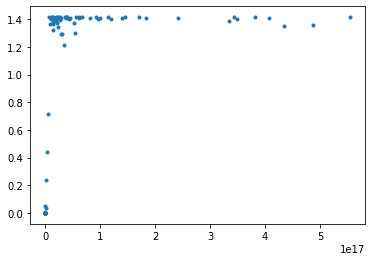

In [14]:
conds = []
norms = []
Qs = []
Rs = []
for A in As:
    Q, R = qr_method(A)
    Qs.append(Q)
    Rs.append(R)
    
    norm = np.linalg.norm(np.identity(8) - Q.T @ Q)
    cond = np.linalg.cond(A)
    conds.append(cond)
    norms.append(norm)

plt.scatter(conds, norms, marker='.')
plt.plot()
plt.show()

5. Zinterpretuj wyniki (a). Jaka jest przyczyna uzyskanych rozbieżności? (b) Od czego zależy wielkość rozbieżności? (c)

 a) Wykres pokazuje że czym większe wartości $Cond(A_i)$ tym większe rozbieżności $||I−Q^T_i Q_i||$

 b) Wskaźnik pozwala na oszacowanie, z jaką (maksymalnie) dokładnością (do ilu miejsc po przecinku) możemy podać wynik, to oznacza że dla coraz wiekszych wskaźników uwarunkowania mamy coraz mniej dokładny wynik i z tego powodu $||I−Q^T_i Q_i|| \neq 0$ dla dużych wartości $Cond(A_i)$.

 c) Czym wieksza wartość $Cond(A_i)$ tym większa rozbierzność mnożenia $Q^T_i*Q_i$. Prościej ujmując dla dużych $Cond(A_i)$ w macierzy przechowujemy duże (oraz małe) wartości i przez różnice między wartościami tracimy dokładność obliczeń.
 
### Wnioski:
 - Zaimplementowana funkcja qr_method działa poprawnie, dla dobrze uwarunkowanych macierzy.
 - Dekompozycja QR jest przydatna do rozwiązywania równań, oraz na bazie rozkładu QR możliwa jest realizacja metody najmniejszych kwadratów (regresja liniowa). W zadaniu 2 jeszcze sie o tym więcej dowiemy.
 - Wskaźnik uwarunkowania określa, w jakim stopniu błąd reprezentacji numerycznej danych wejściowych danego problemu wpływa na błąd wyniku.
 - Przy źle uwarunkowanych macierzach wyniki nie nadają się do numerycznego rozwiązywania, ponieważ już sam błąd wynikający z numerycznej reprezentacji liczb wprowadza nieproporcjonalnie duży błąd w odpowiedzi. Można tego uniknąć stosując odpowiednie algorytmy.
 

### 2. Rozwiązywanie układów równań metodą QR

Bezpośrednie rozwiązywanie układu równań przy pomocy równań normalnych jest obarczone dużym błędem jeśli macierz $A$ jest źle uwarunkowana (jej współczynnik uwarunkowania jest wysoki). Lepszym sposobem jest wykorzystanie dekompozycji $QR$ w tym celu.

Napisz funkcję rozwiązującą nadokreślony układ równań liniowych metodą $QR$ korzystając z własności macierzy ortogonalnych: $A^T = A^{−1}$, a także z mechanizmu back substitution. Następnie wykorzystaj ją do rozwiązania problemu aproksymacji średnio-kwadratowej dla zbioru punktów podanego tabeli poniżej. 
Przyjmij model postaci: $$f(x)=\alpha_0 + \alpha_1x + \alpha_2x^2$$

Przedstaw wizualizację uzyskanego wyniku (punkty oraz funkcja aproksymująca $f$).

<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">x</th>
    <th class="tg-0pky">-5</th>
    <th class="tg-0pky">-4</th>
    <th class="tg-0pky">-3</th>
    <th class="tg-0pky">-2</th>
    <th class="tg-0pky">-1</th>
    <th class="tg-0pky">0</th>
    <th class="tg-0pky">1</th>
    <th class="tg-0pky">2</th>
    <th class="tg-0pky">3</th>
    <th class="tg-0pky">4</th>
    <th class="tg-0pky">5</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">y</td>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">7</td>
    <td class="tg-0pky">9</td>
    <td class="tg-0pky">12</td>
    <td class="tg-0pky">13</td>
    <td class="tg-0pky">14</td>
    <td class="tg-0pky">14</td>
    <td class="tg-0pky">13</td>
    <td class="tg-0pky">10</td>
    <td class="tg-0pky">8</td>
    <td class="tg-0pky">4</td>
  </tr>
</tbody>
</table>

In [34]:
xs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
ys = [2, 7, 9, 12, 13, 14, 14, 13, 10, 8, 4]

A = np.array([[1, x, x ** 2] for x in xs])
B = np.array(ys)

def function(x, a_0, a_1, a_2):
    return a_0 + a_1 * x + a_2 * x ** 2

def back_substitution(A, B):
    n = A.shape[0]
    x = np.zeros(3)
    
    for i in range(n - 1, -1, -1): 
        for j in range(i + 1, n): 
            B[i] -= A[i,j] * x[j]
        x[i] = B[i] / A[i,i]

    return x

def least_squares(A, B):
    Q, R = np.linalg.qr(A)
    return back_substitution(R, Q.T @ B)

Funkcja least_squares(A, B) korzysta z własności macierzy ortogonalnych: 
$$Ax = B$$
$$QRx = B$$
$$Q^{-1}QRx = Q^{-1}B$$
$$Rx = Q^TB$$
Oraz z algorytmu back_substitution, jest on bardzo prosty. Dla górnej macierzy trójkątnej wystarczy od tyłu wyliczać wartości x i następnie odejmować na kolejnych rzędach już obliczone wartości x.

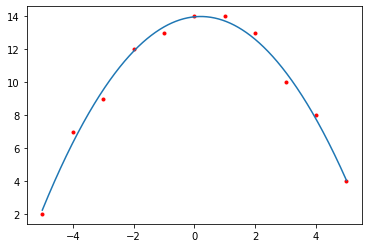

f(x) = 13.972027972027972 + 0.181818181818182x + -0.43356643356643365x²


In [35]:
a_0, a_1, a_2 = least_squares(A, B)

linspace = np.linspace(xs[0], xs[-1], 1000)
plt.scatter(xs, ys, marker='.', color='red')
plt.plot(linspace, function(linspace, a_0, a_1, a_2))
plt.show()

print(f'f(x) = {a_0} + {a_1}x + {a_2}x²')

### Wnioski:
 - Funkcja najmniejszych kwadratów działa prawidłowo i aproksymuje funkcje dla podanych punktów jak widać na wykresie powyżej.
 - Dekompozycja QR może pomóc uniknąć błędów przy macierach źle uwarunkowanych, dzieje się tak dlatego, że macierz Q w poniższym przykładzie ma wartości poniżej 1 a macierz R wartości $10^{39}$ 
 
$$
Q = \begin{bmatrix}
-0.04410122 & 0.56451194 &-0.29226639 & 0.30376541 &-0.1885703 &  0.0803302 &0.55114706 &-0.41637344 \\
0.53610821 &-0.12566663 & 0.58691661 & 0.09378356 &-0.2328369  & 0.32810951 & -0.00168042 & 0.1349004 \\
0.11019533 & 0.61334801 &-0.10876591 &-0.09159625 &-0.23731679 & 0.3238321 &-0.63372065 & 0.58782133 \\
0.1378424  & 0.03766194 & 0.14893488 & 0.07913792 &-0.04655128 & 0.43280916 &0.46010247 &-0.41637344 \\
0.55637637 &-0.03429011 &-0.1918793  & 0.48995946 &-0.21098984 &-0.54153746 &-0.10464666 & 0.3000338 \\
-0.18982355 &-0.16057738 &-0.0731971  & 0.74450692 & 0.40648409 & 0.37922543 &-0.25726532 & 0.220433 \\
-0.07711683 & 0.50421516 & 0.61395137 & 0.1049111 &  0.45283679 &-0.3723013 &0.01795381 & 0.38805392 \\
0.57268218 & 0.08201302 &-0.34203195 &-0.28092947 & 0.66101041 & 0.13422818 &0.0740219 &  0.01836942
\end{bmatrix}
$$
$$
R = \begin{bmatrix}
1.17e+39 & -1.46e+38 & 5.03e+38 & 5.18e+37 & -1.71e+38 & 5.52e+38 & 5.14e+38 & 2.21e+38 \\
0.00e+00 & 1.14e+39 & 4.17e+38 & 1.01e+37 & 2.50e+38 & 3.00e+38 & 3.46e+38 & 4.33e+38 \\
0.00e+00 & 0.00e+00 & 7.91e+38 & -7.51e+37 & 2.63e+38 &-1.17e+38 & 1.34e+38 &-4.46e+38 \\
0.00e+00 & 0.00e+00 & 0.00e+00 & 9.44e+38 & 5.27e+38 & 7.20e+37 &-1.62e+38 & 8.11e+38 \\
0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 7.12e+38 &-9.62e+37 & 5.56e+38 & 3.14e+38 \\
0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 5.93e+38 &-2.79e+38 & 1.04e+38 \\
0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 2.09e+38 &-2.90e+38 \\
0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 4.42e+38
\end{bmatrix}$$